In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as graph
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score
from IPython.display import display, Markdown
from Helpers import timestamp

warnings.filterwarnings('ignore')
graph.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('relatedness-matrix-925-all-28-01-2018.csv', index_col=0)

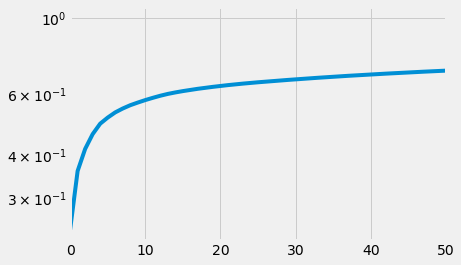

In [3]:
pca = PCA()
pca_fit = pca.fit(df.values)
pcas = pca.transform(df.values)

graph.plot(np.cumsum(pca_fit.explained_variance_ratio_))
graph.xlim(0, 50)
graph.yscale('log')
graph.show()

In [9]:
pcas10 = df.values[:, :10]
print(pcas10.shape)

(925, 10)


100%|██████████| 68/68 [00:21<00:00,  3.11it/s]


Best model GMM with spherical: n_clusters = 9, aic_score = -46232.79032299205
Best model GMM with spherical: n_clusters = 2, bic_score = -45969.73485214382


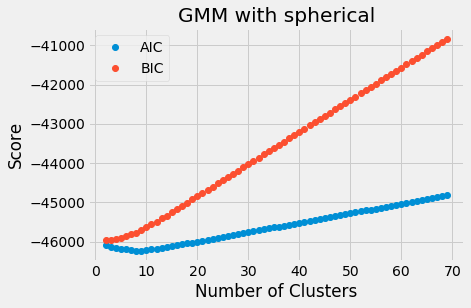

100%|██████████| 68/68 [00:21<00:00,  3.15it/s]


Best model GMM with diag: n_clusters = 5, aic_score = -46105.830436715136
Best model GMM with diag: n_clusters = 2, bic_score = -45853.62027398839


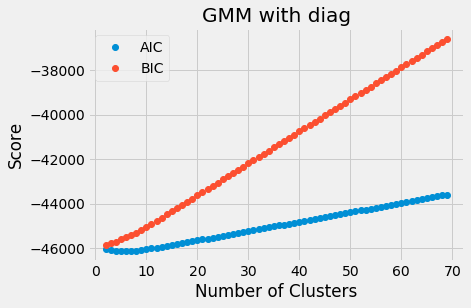

100%|██████████| 68/68 [00:24<00:00,  2.80it/s]


Best model GMM with full: n_clusters = 2, aic_score = -45875.7929534376
Best model GMM with full: n_clusters = 2, bic_score = -45243.08997382347


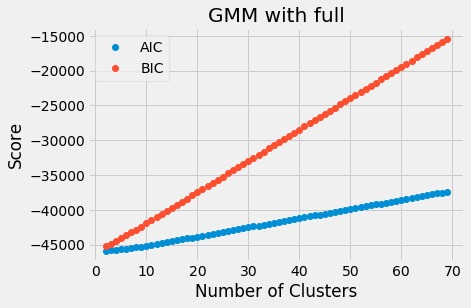

In [10]:
clusters = range(2, 70)

for covar_type in ['spherical', 'diag', 'full']:
    models = [GMM(n_clusters, covariance_type=covar_type, random_state=0).fit(pcas10) for n_clusters in tqdm(clusters)]
    aics = np.array([model.aic(pcas10) for model in models])
    bics = np.array([model.bic(pcas10) for model in models])
    
    for scorer in ['aics', 'bics']:
        scores = eval(scorer)
        best_model_idx = np.argmin(scores)
        df['{}_{}_grouping'.format(scorer, covar_type)] = models[best_model_idx].predict(pcas10)
    
        print('Best model GMM with {}: n_clusters = {}, {}_score = {}'.format(
            covar_type, best_model_idx + clusters[0], scorer[:-1], np.min(scores), 
        ))
        
    graph.plot(clusters, aics, 'o', label='AIC')
    graph.plot(clusters, bics, 'o', label='BIC')
    graph.legend(loc='best')
    graph.title('GMM with {}'.format(covar_type))
    graph.xlabel('Number of Clusters')
    graph.ylabel('Score')
    graph.show()

# Exploring the Clusters

In [11]:
label_df = df[[col for col in df.columns if 'aics' in col or 'bics' in col]]

In [12]:
print(label_df.columns)

Index(['aics_spherical_grouping', 'bics_spherical_grouping',
       'aics_diag_grouping', 'bics_diag_grouping', 'aics_full_grouping',
       'bics_full_grouping'],
      dtype='object')


In [15]:
for cluster in label_df['bics_full_grouping'].unique():
    display(Markdown(f'### Cluster {cluster} members'))
    colonies = label_df.query(f'bics_full_grouping == {cluster}').index.tolist()
    print(f'N = {len(colonies)}')
    print(colonies)

### Cluster 0 members

N = 924
[1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1

### Cluster 1 members

N = 1
[1009]


In [11]:
# Save Labelled data
label_df.to_csv(f'relationship-matrix-cluster-groupings-{timestamp()}.csv')